<a href="https://colab.research.google.com/github/Alveuz/Intro2MLwithPython/blob/master/notebooks/03FromReg2ClasswAns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos Clásicos de ML con ``Scikit Learn``

<img src="https://docs.google.com/uc?export=download&id=1CIfbX5jBvNjuSQnJechEvnawuMEa5QTq" width="300" align="middle">

---

## Contenido de la Sesión


1. Regresión con otros Algoritmos
          1.1. Selección de Variables: Filtros.
            1.1.1. Menor Varianza.
            1.1.2. Univariable.
          1.2. Selección de Variables: Envoltorios.
            1.2.1. Eliminación Recursiva.
          1.3. Validación Cruzada (CV).
          1.4. Predicción.
          1.5. Análisis de Resultados.

2. Clasificación Binaria.
          2.0. Conjuntos de datos sintéticos
          2.1. Clasificadores RL/KNN/DT
            - Evaluación de Clasificadores
          2.2. CV para
            2.2.1. Selección de Variables Recursiva.
            2.2.2. Sintonización de parámetros.

3. Ejercicio/Tarea: Predecir si sobrevive un pasajero del Titanic


by GSB

---
# 1. Regresión con otros Algoritmos

### Comparación de Regresores (LRM vs KNN vs DT) usando el caso de Generación de Energía para un Generador de Ciclo Combinado [02: Regresión Lineal con Scikit Learn](02-RegresionLinealwAns.ipynb)

### Inicialización del Modelo usando ``Pipelines``

<img src="https://docs.google.com/uc?export=download&id=1D4d8y7ENGmDwt-rcbs28p1NoQ2LpFSsk" width="800" align="middle">

**Pensamiento de Programador**:

Dentro de un ``pipeline``, para manipular los parámetros del modelo o para obtener el nombre de las variables utilizadas por modelo al aplicarle ``PolynomialFeatures``, conveniene más crear una **instancia por cada estimador**.

Secuencia de Pasos para el PP/Creación de Variables:

    Paso 1: ajustar el "escalador" al conjunto de ENTRENAMIENTO.
    Paso 2: use el "escalador" para transformar el conjunto de ENTRENAMIENTO.
    Paso 3: use el conjunto de ENTRENAMIENTO transformado para entrenar el modelo con la función ``fit``.
    Paso 4: use el "escalador" para transformar el conjunto de PRUEBA.
    Paso 5: prediga usando el modelo entrenado y el conjunto de PRUEBA transformado.


**Secuencia de Pasos para el PP/Creación de Variables:**

Paso 1: ajustar el "escalador" al conjunto de ENTRENAMIENTO.

Paso 2: use el "escalador" para transformar el conjunto de ENTRENAMIENTO.

Paso 3: use el conjunto de ENTRENAMIENTO transformado para entrenar el modelo con la función ``fit``.

Paso 4: use el "escalador" para transformar el conjunto de PRUEBA.

Paso 5: prediga usando el modelo entrenado y el conjunto de PRUEBA transformado.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd

from google.colab import data_table

#--------
### LOAD DATA 

url = 'https://raw.githubusercontent.com/Alveuz/RandomDataSets/master/CombinedCyclePowerGen/Folds5x2_pp.csv'
ccpp_df = pd.read_csv(url)

#--------
### CREATE PIPELINES
no_poly = 5

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

lr_m  = LinearRegression()
knn_m = KNeighborsRegressor(n_neighbors=5)
dt_m  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)

polyFt_m = PolynomialFeatures(no_poly)

#--------
### SPLIT DATA INTO TRAIN AND TEST DATASETS

X_ccpp = ccpp_df.iloc[:,0:4]
y_ccpp = ccpp_df['PE']

X_train, X_test, y_train, y_test = train_test_split(X_ccpp, y_ccpp, 
                                                    test_size=0.3, 
                                                    random_state=1)


---
### Selección de Variables con ``SkLearn``

#### **1.1. Filtros**

- Previos al entrenamiento del modelo

##### **1.1.1. Filtro de poca Varianza**

- Se utiliza exclusivamente sobre la matriz de características ``X``.

En nuestro ejercicio de los regresores, este filtro eliminará las variables con varianza menor a 0.01

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

sel = VarianceThreshold(threshold=(0.01))
X_train_sel = sel.fit_transform(X_train_tmp)

#Obtain a mask of True and False values: 
#true -> feat is selected
#false -> otherwise
ft_sel_msk = sel.get_support()

ft_names = polyFt_m.get_feature_names(X_ccpp.columns)
ft_names = np.asarray(ft_names)
# print('Antes:', ft_names)
# print('Despues:', ft_names[ft_msk])

X_train_sel = pd.DataFrame(X_train_sel,
                   columns=ft_names[ft_sel_msk])

print(X_train_sel)

            AT         V        AP  ...      AP^5   AP RH^4      RH^5
0     0.487044  0.653737  0.670297  ...  0.135312  0.168208  0.177613
1     0.857774  0.695374  0.531436  ...  0.042389  0.010852  0.007719
2     0.558304  0.461566  0.519802  ...  0.037948  0.267086  0.435027
3     0.507362  0.763701  0.287871  ...  0.001977  0.125353  0.353728
4     0.100118  0.325445  0.612624  ...  0.086292  0.156786  0.182030
...        ...       ...       ...  ...       ...       ...       ...
6692  0.812132  0.814591  0.447525  ...  0.017951  0.009295  0.007884
6693  0.702002  0.953025  0.444059  ...  0.017267  0.198520  0.365557
6694  0.247644  0.254093  0.441337  ...  0.016744  0.028150  0.032054
6695  0.545053  0.342349  0.551238  ...  0.050897  0.000241  0.000063
6696  0.458186  0.282384  0.146040  ...  0.000066  0.015942  0.062745

[6697 rows x 59 columns]


##### **1.1.2. Selección de las K mejores variables**

- Selecciona las mejores características basadas en pruebas estadísticas univariadas.
- Se utiliza exclusivamente sobre la matriz de características ``X``.
- Utiliza una función de ``scoring`` para determinar las K mejores variables

En nuestro ejercicio de los regresores, este filtro seleccionará las 50 mejores variables de acuerdo a la prueba F de Fisher.

In [ ]:
import warnings
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

warnings.filterwarnings("ignore")

no_fts = 50

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

sel = SelectKBest(f_regression, k=no_fts)
# sel = SelectKBest(mutual_info_regression, k=no_fts)
X_train_sel = sel.fit_transform(X_train_tmp, y_train)

# f_res, pval = f_regression(X_train_tmp, y_train)
# print(pval<0.001)

#Obtain a mask of True and False values: 
#true -> feat is selected
#false -> otherwise
ft_sel_msk = sel.get_support()

ft_names = polyFt_m.get_feature_names(X_ccpp.columns)
ft_names = np.asarray(ft_names)

X_train_sel = pd.DataFrame(X_train_sel,
                   columns=ft_names[ft_sel_msk])

print(X_train_sel)


            AT         V      AT^2  ...  AT V^2 AP RH       V^5    V^4 AP
0     0.487044  0.653737  0.237211  ...      0.098750  0.119403  0.122427
1     0.857774  0.695374  0.735776  ...      0.083324  0.162589  0.124258
2     0.558304  0.461566  0.311703  ...      0.052345  0.020949  0.023592
3     0.507362  0.763701  0.257416  ...      0.069198  0.259787  0.097925
4     0.100118  0.325445  0.010024  ...      0.004620  0.003651  0.006872
...        ...       ...       ...  ...           ...       ...       ...
6692  0.812132  0.814591  0.659558  ...      0.091554  0.358672  0.197049
6693  0.702002  0.953025  0.492807  ...      0.231515  0.786179  0.366318
6694  0.247644  0.254093  0.061328  ...      0.003546  0.001059  0.001840
6695  0.545053  0.342349  0.297083  ...      0.005093  0.004703  0.007572
6696  0.458186  0.282384  0.209935  ...      0.003067  0.001796  0.000929

[6697 rows x 50 columns]


--- 
#### **1.2. Envoltorios**

- Utilizan la calidad del modelo para añadir o eliminar variables.

##### **1.2.1. Eliminación Recursiva de Variables**

- Utiliza un REGRESOR que asigne pesos a las variables independientes (e.g. los coeficientes de una LRM) ó
- Redución progresiva de las variables 
  $$
  crit:|X_{new}|>=K
  $$
- Su funcionamiento es en 2 pasos y se itera mientras $crit==T$:

  - Se entrena sobre todas las variables disponibles y se obtiene sus pesos (con del parámetro ``coef_``) o la importancia de sus variables (con el atributo ``feature_importances_``).
  - Se eliminan las $\gamma$ variables con menos peso/menor importancia
  $$
  |X_{old}|>|X_{new}|
  $$


In [ ]:
from sklearn.feature_selection import RFE

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

# Temporal models for RFE
lr_tmp  = LinearRegression()
knn_tmp = KNeighborsRegressor(n_neighbors=5)
dt_tmp  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)


rfe_lr = RFE(estimator=lr_tmp, n_features_to_select=50, step=20)
# rfe_knn = RFE(estimator=knn_tmp, n_features_to_select=50, step=20)
rfe_dt = RFE(estimator=dt_tmp, n_features_to_select=50, step=20)

rfe_lr.fit(X_train_tmp, y_train)
# rfe_knn.fit(X_train_tmp, y_train)
rfe_dt.fit(X_train_tmp, y_train)

X_train_rfe_lr = rfe_lr.fit_transform(X_train_tmp, y_train)
X_train_rfe_dt = rfe_dt.fit_transform(X_train_tmp, y_train)

# #Obtain a mask of True and False values: 
# #true -> feat is selected
# #false -> otherwise
ft_rfe_lr_msk = rfe_lr.get_support()
ft_rfe_dt_msk = rfe_dt.get_support()

ft_names = polyFt_m.get_feature_names(X_ccpp.columns)
ft_names = np.asarray(ft_names)

X_train_rfe_lr = pd.DataFrame(X_train_rfe_lr,
                   columns=ft_names[ft_rfe_lr_msk])

print(X_train_rfe_lr)

X_train_rfe_dt = pd.DataFrame(X_train_rfe_dt,
                   columns=ft_names[ft_rfe_dt_msk])

print(X_train_rfe_dt)

np.intersect1d(ft_names[ft_rfe_lr_msk],ft_names[ft_rfe_dt_msk]).shape

             V       V^2    AT^2 V  ...  AT V AP^2 RH  AT V AP RH^2    V^4 AP
0     0.653737  0.427372  0.155074  ...      0.101251      0.106912  0.122427
1     0.695374  0.483545  0.511639  ...      0.063680      0.045296  0.124258
2     0.461566  0.213043  0.143872  ...      0.058950      0.096017  0.023592
3     0.763701  0.583239  0.196589  ...      0.026084      0.073605  0.097925
4     0.325445  0.105914  0.003262  ...      0.008698      0.010098  0.006872
...        ...       ...       ...  ...           ...           ...       ...
6692  0.814591  0.663558  0.537270  ...      0.050298      0.042667  0.197049
6693  0.953025  0.908256  0.469658  ...      0.107874      0.198640  0.366318
6694  0.254093  0.064563  0.015583  ...      0.006159      0.007014  0.001840
6695  0.342349  0.117203  0.101706  ...      0.008201      0.002152  0.007572
6696  0.282384  0.079741  0.059282  ...      0.001586      0.006243  0.000929

[6697 rows x 50 columns]
            RH      AT^2      AT V  ..

(15,)

---
### Inicializar el Pipeline

In [ ]:
model_pl = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         lr_m)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          sel,
                          knn_m)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         dt_m)

---
### 1.3 Entrenamiento de los modelos usando $\underline{\text{Validación Cruzada}}\ (CV)$

<img src="https://docs.google.com/uc?export=download&id=1Jp87zmf057-dRcc1FWBiXQip8FfXIgt-" width="700" align="middle">





In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

#--------
### EVALUATE CV TRAINING ERROR

scoring = {'R2': make_scorer(r2_score), 
           'RMSE': make_scorer(mean_squared_error)}

lrm_scr = cross_validate(model_pl, X_train, y_train, 
                          scoring = scoring, cv=10)
knn_scr = cross_validate(model_knn, X_train, y_train, 
                          scoring = scoring, cv=10)
dt_scr = cross_validate(model_dt, X_train, y_train, 
                         scoring = scoring, cv=10)

print('TRAIN CV ERROR----')

print('LRM_R2: ', np.mean(lrm_scr.get('test_R2')))
print('KNN_R2: ', np.mean(knn_scr.get('test_R2')))
print('DT_R2: ', np.mean(dt_scr.get('test_R2')))

print('LRM_RMSE: ', np.mean(lrm_scr.get('test_RMSE')))
print('KNN_RMSE: ', np.mean(knn_scr.get('test_RMSE')))
print('DT_RMSE: ', np.mean(dt_scr.get('test_RMSE')))

TRAIN CV ERROR----
LRM_R2:  0.9406084833773214
KNN_R2:  0.95008337604592
DT_R2:  0.9330905305540911
LRM_RMSE:  17.276501517859312
KNN_RMSE:  14.526583292792543
DT_RMSE:  19.46764034246271


---
### Visualización del Árbol de Regresión

'ccpp_PE.pdf'

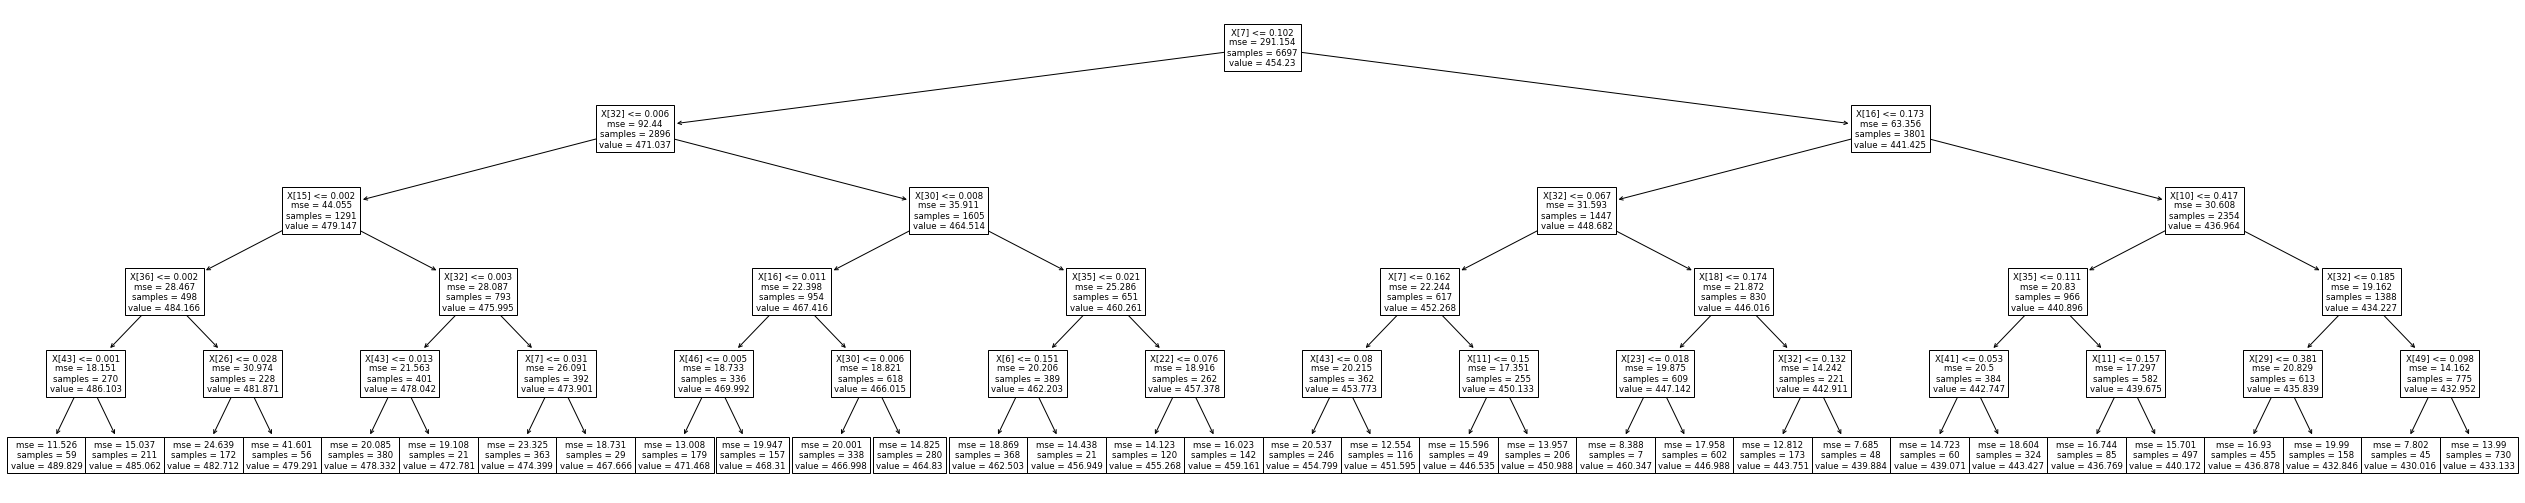

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 

dt_m1  = DecisionTreeRegressor(criterion='mse',
                              max_depth=5,
                              min_samples_split = 20, 
                              random_state=0)


dt_m1.fit(X_train_sel, y_train[:, np.newaxis]);

f, ax = plt.subplots(figsize=(45, 9))
tree.plot_tree(dt_m1);

dot_data = tree.export_graphviz(dt_m1, out_file=None, 
                                feature_names = ft_names[ft_sel_msk],
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("ccpp_PE") 

---
### 1.4. Predicción con los modelos entrenados sobre el conjunto de PRUEBA


In [ ]:
model_pl.fit(X_train, y_train[:, np.newaxis])
model_knn.fit(X_train, y_train[:, np.newaxis])
model_dt.fit(X_train, y_train[:, np.newaxis]);

# #--------
# ### PREDICT TEST DATA 

y_hat = model_pl.predict(X_test)
y_hatknn = model_knn.predict(X_test)
y_hatdt = model_dt.predict(X_test)

# #--------
# ### PRINT SCORES

print('TEST ERROR----')

print('LR R2: ',r2_score(y_test,y_hat))
print('KNN R2: ',r2_score(y_test,y_hatknn))
print('DT R2: ',r2_score(y_test,y_hatdt))

print('LR RMSE: ',mean_squared_error(y_test,y_hat, squared=False), 'MW')
print('KNN RMSE: ',mean_squared_error(y_test,y_hatknn, squared=False), 'MW')
print('DT RMSE: ',mean_squared_error(y_test,y_hatdt, squared=False), 'MW')

TEST ERROR----
LR R2:  0.9440331462691579
KNN R2:  0.9531937358196361
DT R2:  0.9350742028625183
LR RMSE:  4.037980644460505 MW
KNN RMSE:  3.6927573916526137 MW
DT RMSE:  4.349180494407878 MW


---
### 1.5. Análisis de Resultados usando Gráficas Q-Q 

  Created wheel for seaborn-qqplot: filename=seaborn_qqplot-0.3.2-cp36-none-any.whl size=12632 sha256=ea297d08c9e2efa899dffbcdfb7b140931bc7b00f56a654bfca5a2075dee78b6
  Stored in directory: /root/.cache/pip/wheels/4e/37/aa/3aa9b433dfe80aebcec84b2970849fc3cb4d6e4f67ff89458b
Successfully built seaborn-qqplot


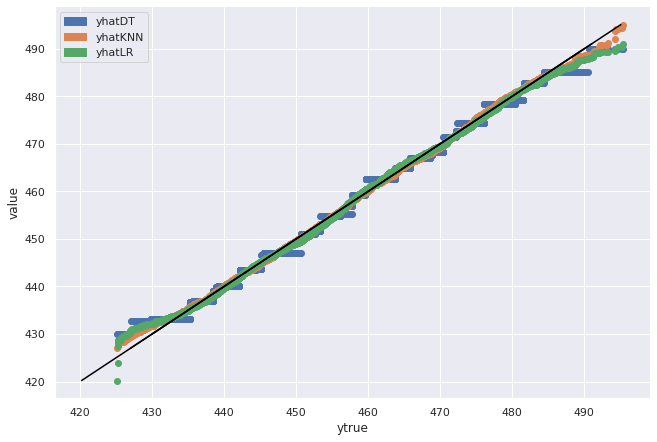

In [ ]:
!pip install seaborn-qqplot;

import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

from seaborn_qqplot import qqplot

#--------
### GRAPH QQPLOTS

x_plt = np.linspace(1, y_hat.shape[0], y_hat.shape[0])
mod_res = np.hstack((x_plt[:,np.newaxis],
                     y_test[:,np.newaxis],
                     y_hat,
                     y_hatknn,
                     y_hatdt[:,np.newaxis])) 

mod_res_df = pd.DataFrame(mod_res, 
                          columns=['index', 'ytrue','yhatLR', 'yhatKNN', 'yhatDT'])
#Cambia el formato a tidy de R
mod_res_df_mlt = pd.melt(mod_res_df, 
                         id_vars=['ytrue'],
                         value_vars =['yhatLR', 'yhatKNN', 'yhatDT'])

mod_res_df_mlt['variable'] = mod_res_df_mlt['variable'].astype('category')


qqplot(mod_res_df_mlt, x="ytrue", y="value", 
       hue = "variable", height = 6, aspect = 1.5,
       display_kws={"identity":True});

---
# 2. Clasificación 

---
## 2.0. Datos Sintéticos

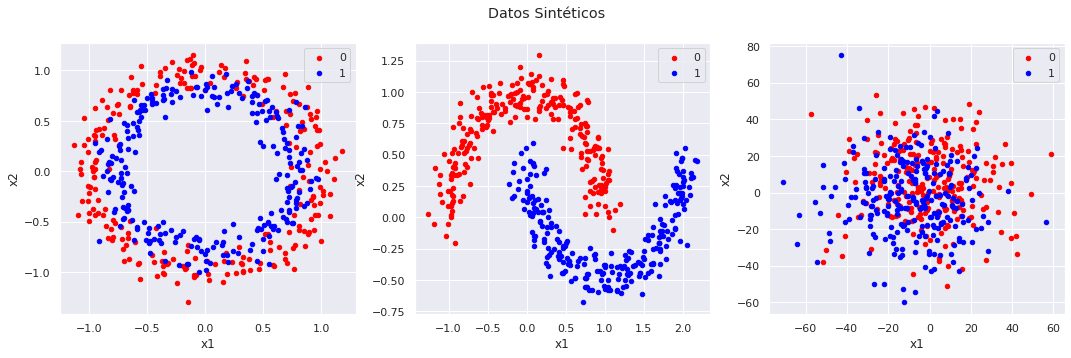

In [ ]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

exp_size = 500

# generate 2d classification dataset
X_circ, y_circ = make_circles(n_samples=exp_size, noise=0.1,
                              random_state=1)
X_moon, y_moon = make_moons(n_samples=exp_size, noise=0.1,
                            random_state=1)

# generate 2d multi classification dataset
X_blob, y_blob = make_blobs(n_samples=exp_size, centers=2, cluster_std= 20,
                            n_features=2,random_state=1)

# scatter plot, dots colored by class value
df_circ = DataFrame(dict(x1 = X_circ[:,0], x2=X_circ[:,1], label=y_circ))
df_moon = DataFrame(dict(x1 = X_moon[:,0], x2=X_moon[:,1], label=y_moon))
colors_bin = {0:'red', 1:'blue'}

df_blob = DataFrame(dict(x1 = X_blob[:,0], x2=X_blob[:,1], label=y_blob))
colors_mult = {0:'red', 1:'blue', 2:'green', 3:'purple'}

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))
fig.suptitle('Datos Sintéticos')

grouped = df_circ.groupby('label')
for key, group in grouped:
    group.plot(ax=ax1, kind='scatter', x='x1', y='x2', label=key, color=colors_bin[key])

grouped = df_moon.groupby('label')
for key, group in grouped:
    group.plot(ax=ax2, kind='scatter', x='x1', y='x2', label=key, color=colors_bin[key])

grouped = df_blob.groupby('label')
for key, group in grouped:
    group.plot(ax=ax3, kind='scatter', x='x1', y='x2', label=key, color=colors_mult[key])

---
## 2.1. Clasificación de los Datos Sintéticos

In [ ]:
!pip install mlxtend

### 2.1.1. Regresión Logística

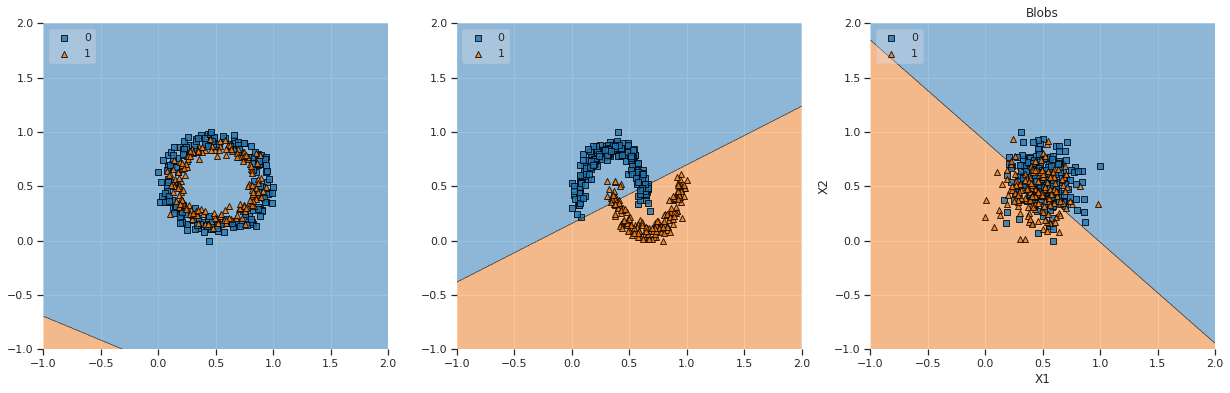

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

import warnings
warnings.filterwarnings("ignore")

### Initialize PP instances
no_poly = 1
no_sel_fts = 2

sclr_01 = MinMaxScaler()
polyFt_m = PolynomialFeatures(no_poly,include_bias=False)

### Initialize Ft Selection
sel = SelectKBest(chi2, k=no_sel_fts)

fig, axs = plt.subplots(1,3,figsize=(21,6))

### Initialize Model
model = LogisticRegression()

### Block 1 -----
X_train, X_test, y_train, y_test = train_test_split(X_circ, y_circ, 
                                                    test_size=0.3, 
                                                    random_state=1)

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

X_train_sel = sel.fit_transform(X_train_tmp, y_train)
model.fit(X_train_sel,y_train)

# Plotting decision regions
plot_decision_regions(X_train_sel, y_train, clf=model, legend=2, ax = axs[0]);
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circles')
### Block 1 -----

### Block 2 -----
X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, 
                                                    test_size=0.3, 
                                                    random_state=1)

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

X_train_sel = sel.fit_transform(X_train_tmp, y_train)

model.fit(X_train_sel,y_train)

# Plotting decision regions
plot_decision_regions(X_train_sel, y_train, clf=model, legend=2, ax = axs[1]);
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Moons')
### Block 2 -----

### Block 3 -----
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, 
                                                    test_size=0.3, 
                                                    random_state=1)
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

X_train_sel = sel.fit_transform(X_train_tmp, y_train)

model.fit(X_train_sel,y_train)

# Plotting decision regions
plot_decision_regions(X_train_sel, y_train, clf=model, legend=2, ax = axs[2]);
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Blobs')
### Block 3 -----

plt.show();

### 2.1.2. Árbol de Decisión

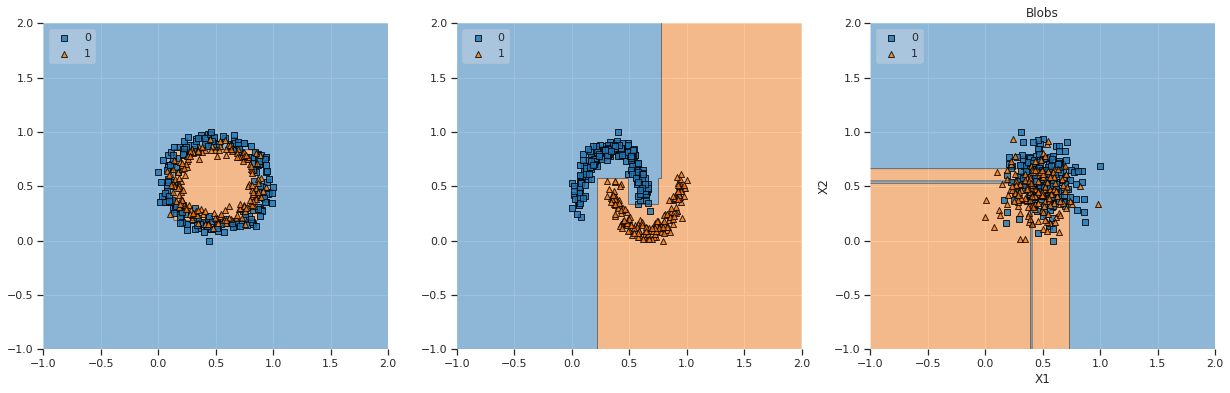

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

import warnings
warnings.filterwarnings("ignore")

### Initialize PP instances
no_poly = 1
no_sel_fts = 2

sclr_01 = MinMaxScaler()
polyFt_m = PolynomialFeatures(no_poly,include_bias=False)

### Initialize Ft Selection
sel = SelectKBest(chi2, k=no_sel_fts)

### Initialize Model
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=5,
                               min_samples_split = 20, 
                               random_state=0)

### Initialize Figs
fig, axs = plt.subplots(1,3,figsize=(21,6))

### Block 1 -----
X_train, X_test, y_train, y_test = train_test_split(X_circ, y_circ, 
                                                    test_size=0.3, 
                                                    random_state=1)

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

X_train_sel = sel.fit_transform(X_train_tmp, y_train)

model.fit(X_train_sel,y_train)

# Plotting decision regions
plot_decision_regions(X_train_sel, y_train, clf=model, 
                      legend=2, ax = axs[0]);
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circles')
### Block 1 -----

### Block 2 -----
X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, 
                                                    test_size=0.3, 
                                                    random_state=1)

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

X_train_sel = sel.fit_transform(X_train_tmp, y_train)

model.fit(X_train_sel,y_train)

# Plotting decision regions
plot_decision_regions(X_train_sel, y_train, clf=model, 
                      legend=2, ax = axs[1]);
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Moons')
### Block 2 -----

### Block 3 -----
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, 
                                                    test_size=0.3, 
                                                    random_state=1)
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

X_train_sel = sel.fit_transform(X_train_tmp, y_train)

model.fit(X_train_sel,y_train)

# Plotting decision regions
plot_decision_regions(X_train_sel, y_train, clf=model,
                      legend=2, ax = axs[2]);
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Blobs')
### Block 3 -----

plt.show();

### 2.1.3. K-Vecinos Cercanos

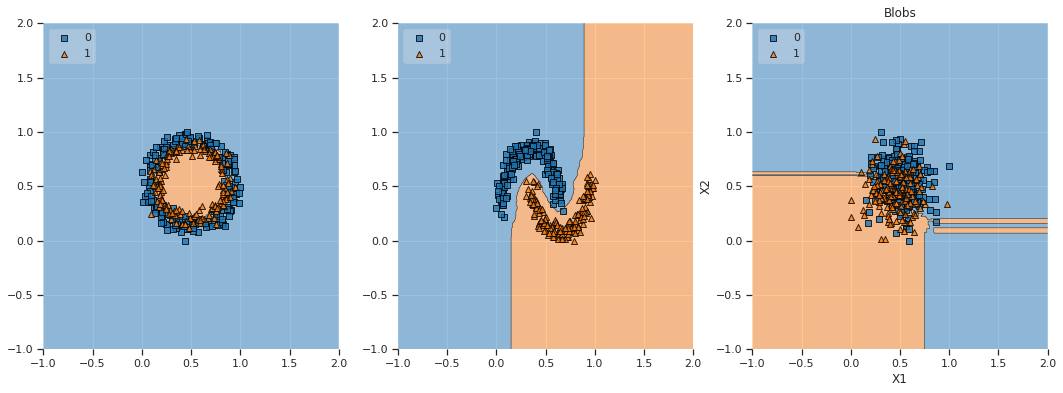

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

import warnings
warnings.filterwarnings("ignore")

### Initialize PP instances
no_poly = 1
no_sel_fts = 2

sclr_01 = MinMaxScaler()
polyFt_m = PolynomialFeatures(no_poly,include_bias=False)

### Initialize Ft Selection
sel = SelectKBest(chi2, k=no_sel_fts)

### Initialize Model
model = KNeighborsClassifier(n_neighbors=20,p=1)

fig, axs = plt.subplots(1,3,figsize=(18,6))

### Block 1 -----
X_train, X_test, y_train, y_test = train_test_split(X_circ, y_circ, 
                                                    test_size=0.3, 
                                                    random_state=1)

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

X_train_sel = sel.fit_transform(X_train_tmp, y_train)

model.fit(X_train_sel,y_train)

# Plotting decision regions
plot_decision_regions(X_train_sel, y_train, clf=model,
                      legend=2, ax = axs[0]);
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circles')
### Block 1 -----

### Block 2 -----
X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, 
                                                    test_size=0.3, 
                                                    random_state=1)

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

X_train_sel = sel.fit_transform(X_train_tmp, y_train)

model.fit(X_train_sel,y_train)

# Plotting decision regions
plot_decision_regions(X_train_sel, y_train, clf=model,
                      legend=2, ax = axs[1]);
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Moons')
### Block 2 -----

### Block 3 -----
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, 
                                                    test_size=0.3, 
                                                    random_state=1)
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

X_train_sel = sel.fit_transform(X_train_tmp, y_train)

model.fit(X_train_sel,y_train)

# Plotting decision regions
plot_decision_regions(X_train_sel, y_train, clf=model,
                      legend=2, ax = axs[2]);
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Blobs')
### Block 3 -----

plt.show();

---
### Evaluación de Clasificadores: 

#### a) Matriz de Confusión

<img src="https://docs.google.com/uc?export=download&id=1u_i_kvdUCeB5pykkGkjRcJwaRbHPVkIR" width="900" align="middle">

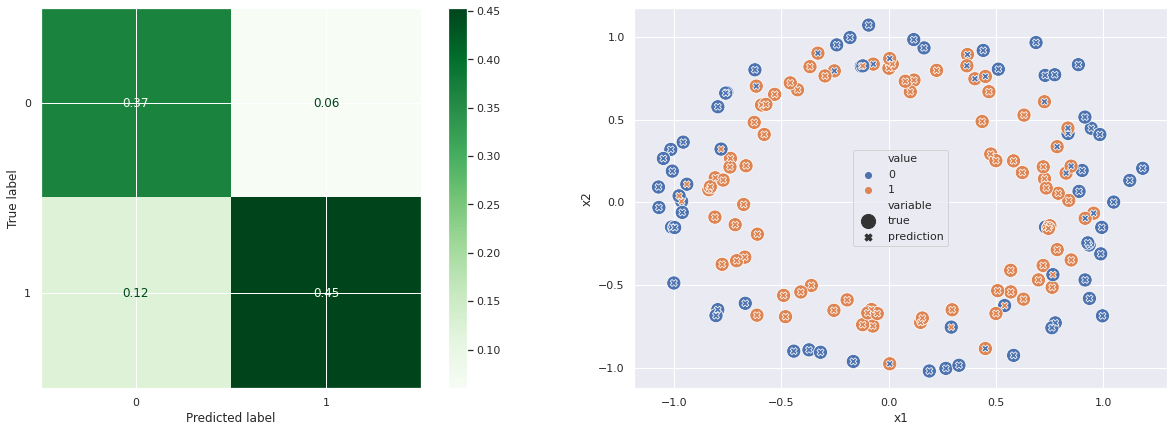

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

X_train, X_test, y_train, y_test = train_test_split(X_circ, y_circ, 
                                                    test_size=0.3, 
                                                    random_state=1)

# X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, 
#                                                     test_size=0.3, 
#                                                     random_state=1)

# X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, 
#                                                     test_size=0.3, 
#                                                     random_state=1)

# model = LogisticRegression()
# model = DecisionTreeClassifier(criterion='entropy',
#                                max_depth=5,
#                                min_samples_split = 20, 
#                                random_state=0)
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)

# make a prediction
yhat = model.predict(X_test)

res_df = pd.DataFrame({'x1': X_test[:,0],
                         'x2': X_test[:,1],  
                         'true': y_test[:],
                         'prediction': yhat[:]})

res_df_mlt = pd.melt(res_df,
                       id_vars=['x1','x2'],
                       value_vars=['true', 'prediction'])

# print(res_df_mlt.head())

fig, axs = plt.subplots(1,2,figsize=(21,7))
disp = plot_confusion_matrix(model, X_test, y_test,
                            #  display_labels=['1','0'],
                             cmap=plt.cm.Greens,ax=axs[0], normalize = 'all'
                            )

sns.scatterplot(x="x1", y="x2", hue="value", style= 'variable', size='variable', sizes=[200,50],
                     data=res_df_mlt, ax=axs[1])

---
## 2.2. Usos de la Validación Cruzada para Clasificación

<img src="https://docs.google.com/uc?export=download&id=1SYRmAT3I0Qlrwl6kauBqOBlwfhEzMEWG" width="500" align="middle">

### 2.2.1. Como métrica de error en la Selección de Variables Recursivas

Optimal number of features : 5


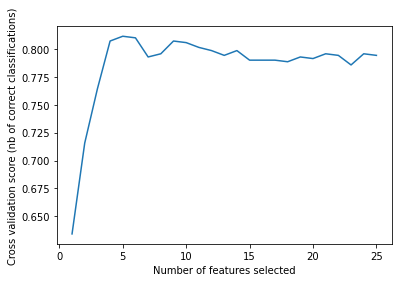

0.82
[[-0.66258088 -1.81975084 -0.255706   -2.88436403  2.49215758]
 [ 0.60609394  0.01164705 -0.14566641  0.19248066 -0.79930864]
 [-0.05934395  0.25178751 -0.02474871  0.6232942  -0.31443942]
 ...
 [ 1.43945801 -0.38373555 -0.05473081 -1.21573246 -0.86974505]
 [ 0.3832606   0.27267227  0.00413808  0.41684014 -0.68258191]
 [-0.06440108  0.12814198  0.03407171  0.20166569 -0.04996599]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification

import matplotlib.pyplot as plt

# Build a classification task using N informative features
X_rand, y_rand = make_classification(n_samples=1000, 
                                     n_features=25, 
                                     n_informative=3,
                                     n_redundant=16, n_repeated=4, 
                                     n_classes=2, class_sep=0.2,
                                     n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
#model = LogisticRegression()
model = DecisionTreeClassifier(criterion='entropy',
                                max_depth=20,
                                min_samples_split = 20, 
                                random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_rand, y_rand, 
                                                    test_size=0.3, 
                                                    random_state=1)

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=10,
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

X_train_rfecv = rfecv.fit_transform(X_train, y_train)
model.fit(X_train_rfecv, y_train)

X_test_rfecv = rfecv.transform(X_test)
yhat = model.predict(X_test_rfecv)

print(accuracy_score(y_test, yhat))

### 2.2.2. Sintonización de Parámetros 

#### a) Búsqueda en Malla (GridSearch)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,classification_report

import numpy as np


# iris = load_iris()
# X, y = load_iris(return_X_y=True);
X, y = load_breast_cancer(return_X_y=True);

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1)


# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': np.arange(2, 10, 1), 
                     'p': [1, 2]},
                    {'n_neighbors': [2,5,10,20],
                     'algorithm': ['kd_tree'],
                     'leaf_size': [20, 30,40]}]


clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters, 
                   scoring='accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Predict:")
print()
y_true, y_hat = y_test, clf.predict(X_test)
print(accuracy_score(y_true, y_hat))
print()
print(classification_report(y_true, y_hat))

Best parameters set found on development set:

{'n_neighbors': 9, 'p': 1}

Grid scores on development set:

0.912 (+/-0.015) for {'n_neighbors': 2, 'p': 1}
0.900 (+/-0.054) for {'n_neighbors': 2, 'p': 2}
0.920 (+/-0.051) for {'n_neighbors': 3, 'p': 1}
0.905 (+/-0.051) for {'n_neighbors': 3, 'p': 2}
0.915 (+/-0.064) for {'n_neighbors': 4, 'p': 1}
0.897 (+/-0.069) for {'n_neighbors': 4, 'p': 2}
0.920 (+/-0.058) for {'n_neighbors': 5, 'p': 1}
0.905 (+/-0.070) for {'n_neighbors': 5, 'p': 2}
0.925 (+/-0.067) for {'n_neighbors': 6, 'p': 1}
0.907 (+/-0.066) for {'n_neighbors': 6, 'p': 2}
0.920 (+/-0.064) for {'n_neighbors': 7, 'p': 1}
0.910 (+/-0.068) for {'n_neighbors': 7, 'p': 2}
0.920 (+/-0.066) for {'n_neighbors': 8, 'p': 1}
0.912 (+/-0.063) for {'n_neighbors': 8, 'p': 2}
0.930 (+/-0.038) for {'n_neighbors': 9, 'p': 1}
0.922 (+/-0.058) for {'n_neighbors': 9, 'p': 2}
0.900 (+/-0.054) for {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 2}
0.905 (+/-0.070) for {'algorithm': 'kd_tree

In [ ]:
X,y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

---
# 3. Ejercicio/Tarea: Predecir si un pasajero del Titanic Sobrevive

<img src="https://docs.google.com/uc?export=download&id=1VE0J-XRaWvFf5g-FDRrn4SJDgkAg5Zcx" width="500" align="middle">

### a) **Objetivos**: 

- Predecir si un pasajero del Titanic sobrevive usando el conjunto ``X_test`` y los 3 algoritmos (KNN/LR/DT) utilizando todos/algunos/ninguno de los conceptos de preprocesamiento. 
- Elija el mejor modelo para realizar las predicciones.
- Si utilizan algún tipo de selección de variables, deben indicar los nombres de las variables seleccionadas.

### b) **Entregales**:

1. El notebook con los modelos desarrollados.
2. Un vector ``y_hat`` con las predicciones para el mejor modelo.

### Evaluación:

1. Los modelos serán evaluados usando **precision**, **recall**, **f1-measure**.

2. Dentro de 2 semanas se publicaran la lista de resultados.
Nota: Pueden usar pseudonimos para la lista de resultados.


El contenido de este conjunto es el siguiente:

- $y$: ``survival``
- $X$: ``cols``$\neq$``survival``

<img src="https://docs.google.com/uc?export=download&id=1siU1W5_j6f5461ywoKoaaXNkCnWsH547" width="700" align="middle">


[Más información del titanic](https://www.kaggle.com/c/titanic)

#### Datos de Entrenamiento del Conjunto Titanic

In [ ]:
import pandas as pd
import numpy as np
from google.colab import data_table

url = 'https://raw.githubusercontent.com/Alveuz/RandomDataSets/master/Titanic/TitanicTrain.csv'
ttnc_df = pd.read_csv(url)

# Quitamos la cabin y el ticket
#print(ttnc_df['cabin'].describe())

ttnc_df = ttnc_df.loc[:,['age','fare','embarked','pclass','sex','sibsp','parch','survival']]
data_table.DataTable(ttnc_df, include_index=True, num_rows_per_page=10)

ttnc_df.head(10)
ttnc_df.describe()


,age,fare,pclass,sibsp,parch,survival
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,29.648122,33.726333,2.297039,0.524355,0.384909,0.382044
std,12.562991,51.138225,0.841457,1.095414,0.845572,0.486119
min,0.166700,0.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,7.895800,2.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,3.000000,0.000000,0.000000,0.000000
75%,35.000000,31.387500,3.000000,1.000000,0.000000,1.000000
max,74.000000,512.329200,3.000000,8.000000,9.000000,1.000000


#### **Datos de Titanic**

In [ ]:
#https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae

**Limpieza de datos**

In [ ]:
ttnc_df

,pregnants,glucose,pressure,thickness,insulin,BMI,function,Age,Class
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


**Normalización**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(ttnc_df)
scaled_df = pd.DataFrame(scaled_df, columns=['pregnants', 'glucose', 'pressure','thickness','insulin','BMI','function','Age','Class'])
scaled_df
ttnc_df = scaled_df

In [ ]:
ttnc_df

,pregnants,glucose,pressure,thickness,insulin,BMI,function,Age,Class
0,0.0000,0.234043,0.488372,0.355556,0.095066,0.253197,0.036542,0.000000,0.0
1,0.1250,0.156028,0.302326,0.555556,0.087846,0.327366,0.072638,0.083333,1.0
2,0.0625,1.000000,0.534884,0.844444,0.635379,0.314578,0.032531,0.533333,1.0
3,0.0000,0.943262,0.418605,0.355556,1.000000,0.304348,0.139483,0.633333,1.0
4,0.2500,0.780142,0.558140,0.266667,0.192539,0.194373,0.223708,0.500000,1.0
...,...,...,...,...,...,...,...,...,...
331,0.0000,0.460993,0.627907,0.711111,0.070999,0.531969,0.078431,0.116667,0.0
332,0.0000,0.510638,0.744186,0.711111,0.114320,0.468031,0.433155,0.266667,1.0
333,0.0625,0.226950,0.395349,0.422222,0.001203,0.260870,0.303476,0.016667,0.0
334,0.5625,0.319149,0.604651,0.911111,0.198556,0.375959,0.038324,0.700000,0.0


In [ ]:
ttnc_df=pdf

Visualización de los datos

NameError: ignored

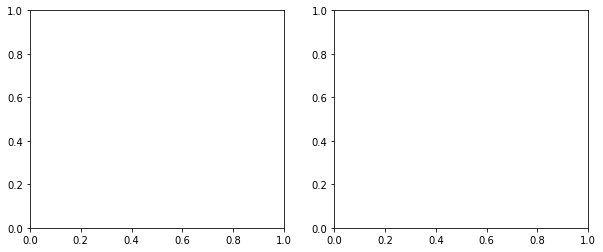

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(ttnc_df['sex'])
# plt.show()

diabetes = 'diabetic'
not_diabetic = 'not diabetic'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = ttnc_df[ttnc_df['sex']=='female']
men = ttnc_df[ttnc_df['sex']=='male']
ax = sns.distplot(women[women['survival']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survival']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survival']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survival']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')



In [ ]:
#sns.barplot(x='pclass', y='survival', data=ttnc_df)
grid = sns.FacetGrid(ttnc_df, col='survival', row='pclass', size=3.0, aspect=1.6,xlim=None)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
# Preprocessing
# Conversion to numbers

ttnc_df_test.describe()



,age,fare,pclass,sibsp,parch
count,262.000000,262.000000,262.000000,262.000000,262.000000
mean,28.923982,31.501796,2.286260,0.396947,0.385496
std,14.201966,54.149804,0.824739,0.784714,0.942941
min,0.416700,0.000000,1.000000,0.000000,0.000000
25%,21.000000,8.050000,2.000000,0.000000,0.000000
50%,28.000000,15.016650,3.000000,0.000000,0.000000
75%,35.000000,29.125000,3.000000,1.000000,0.000000
max,80.000000,512.329200,3.000000,4.000000,9.000000


In [ ]:
#import numpy as np
#mylist = [1,2,3]
#myarray = np.asarray(mylist)
#print (myarray, myarray.shape)

**Librerias**

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

#Elimina los warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Establecemos el pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score,classification_report
#from sklearn import metrics
from sklearn.model_selection import cross_val_score

import numpy as np

# iris = load_iris()
#X, y = load_iris(return_X_y=True);

X = ttnc_df.iloc[1:,0:-1] 
y= ttnc_df.iloc[1:,-1:]

#y = y.values.tolist()
#row_vec = []
#for i in range(len(y)):
#  row_vec.append(i)
#row_vec = np.asarray(row_vec)
#print(row_vec, row_vec.shape)
#y=row_vec

print (X.shape)
print (y.shape)
#np.asarray(mylist)

#print (X, y)
#X_train = X
#y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
#X_test = ttnc_df_test

(335, 8)
(335, 1)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)Pima Indians DB
print(acc_log)

79.1


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

print(acc_decision_tree)

100.0


In [ ]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn)

85.45


In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(acc_gaussian)

77.99


In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(acc_perceptron)

77.24


In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(acc_linear_svc)

80.6


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

100.0


In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print (acc_sgd)

79.85


In [ ]:
X_test

,pregnants,glucose,pressure,thickness,insulin,BMI,function,Age
81,0.5000,0.475177,0.534884,0.822222,0.095066,0.381074,0.128788,0.316667
60,0.0625,0.368794,0.325581,0.422222,0.057762,0.365729,0.103832,0.016667
259,0.3125,0.475177,0.558140,0.844444,0.258724,0.393862,0.288770,0.216667
285,0.0625,0.702128,0.325581,0.444444,0.631769,0.524297,0.069073,0.066667
192,0.1250,0.234043,0.581395,0.200000,0.084236,0.312020,0.207665,0.283333
...,...,...,...,...,...,...,...,...
276,0.0000,0.312057,0.581395,0.111111,0.037304,0.033248,0.028520,0.116667
168,0.0000,0.241135,0.441860,0.244444,0.052948,0.176471,0.527184,0.066667
108,0.0000,0.971631,0.302326,0.200000,0.433213,0.196931,0.254011,0.050000
310,0.0625,0.262411,0.465116,0.555556,0.174489,0.506394,0.262478,0.033333


**Prueba de modelos**

0.7851 accuracy with a standard deviation of 0.06
Without optimization
0.7761194029850746

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        50
         1.0       0.58      0.41      0.48        17

    accuracy                           0.78        67
   macro avg       0.70      0.66      0.67        67
weighted avg       0.76      0.78      0.76        67


Optimal number of features : 2
glucose
Age


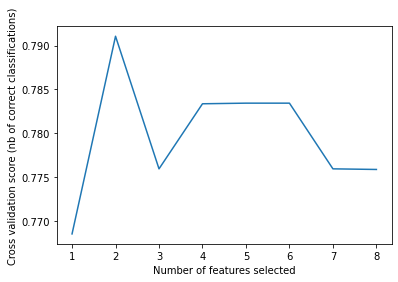

Predict:

0.7761194029850746

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        50
         1.0       0.58      0.41      0.48        17

    accuracy                           0.78        67
   macro avg       0.70      0.66      0.67        67
weighted avg       0.76      0.78      0.76        67



In [ ]:


# Create the RFE object and compute a cross-validated score.
#model = LogisticRegression()

#model = RandomForestClassifier(n_estimators=100)
#model = DecisionTreeClassifier(criterion='entropy',
#                                max_depth=20,
#                                min_samples_split = 20, 
#                                random_state=0)
#model = Perceptron(max_iter=300, random_state=0)
#model = MLPClassifier(random_state=1, max_iter=300)
#model = LinearRegression()
#model =kkn
#model = KNeighborsClassifier(n_neighbors=3)
#model = GaussianNB()
model = LinearSVC()
#model = linear_model.SGDClassifier(max_iter=5, tol=None)


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
#X_train = X
#y_train = y
#clf= MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
#clf.score(X_test, y_test)
clf = model.fit(X_train, y_train)
clf.score(X_test, y_test)
scores = cross_val_score(clf, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=5,
              scoring='accuracy')
#print (X_train)
#print (y_train)
rfecv.fit(X_train, y_train)

y_true, yhat = y_test, rfecv.predict(X_test)
print("Without optimization")
print(accuracy_score(y_test, yhat))
print()
print(classification_report(y_true, yhat))

print("")
print("Optimal number of features : %d" % rfecv.n_features_)
#print(rfecv.support_)
i=0
for element in rfecv.support_:
  if element == True:
    print (X_train.columns[i])
  i= i+1
#print(rfecv.support_)
#print(rfecv.ranking_)


# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

X_train_rfecv = rfecv.fit_transform(X_train, y_train)
#print (X_test, X_train_rfecv.shape, X_train_rfecv)

model.fit(X_train_rfecv, y_train)

#Prueba con X_test
#X_test = ttnc_df_test.loc[:,['embarked','pclass','sex','sibsp']])
#X_test = ttnc_df_test

X_test_rfecv = rfecv.transform(X_test)
yhat = model.predict(X_test_rfecv)

#Aqui el código
#yhat1 = model.predict(ttnc_df_test.loc[:,['embarked','pclass','sex','sibsp','parch']])

print("Predict:")
print()

#y_true, yhat = y_test, model.predict(X_test_rfecv)
#y_true, yhat = y_test, model.predict(X_test_rfecv)
y_true, yhat = y_test, model.predict(X_test_rfecv)
print(accuracy_score(y_test, yhat))
print()
print(classification_report(y_true, yhat))

# print(model.score(X_train_rfecv, y_train))
# acc_sgd = round(model.score(X_train_rfecv, y_train) * 100, 2)
# print(acc_sgd)

# predictions = cross_val_predict(model, X_train, y_train, cv=10)
# print(confusion_matrix(y_train, predictions))

# print("Precision:", precision_score(y_train, predictions))
# print("Recall:",recall_score(y_train, predictions))

ROC AUC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# getting the probabilities of our predictions
#y_scores = model.predict_proba(X_train)
y_scores = model.predict_proba(X_train_rfecv)

y_scores = y_scores[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

AttributeError: ignored

Decision Tree

Optimal number of features : 5
glucose
insulin
BMI
function
Age


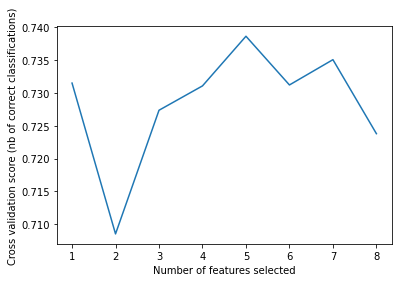

KeyError: ignored

In [ ]:
# Create the RFE object and compute a cross-validated score.
#model = LogisticRegression()
#model = LinearRegression()
model = DecisionTreeClassifier(criterion='entropy',
                                 max_depth=20,
                                min_samples_split = 20, 
                               random_state=0)
#model = KNeighborsClassifier(n_neighbors=3)
#model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
#X_train = X
#y_train = y


# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=10,
              scoring='accuracy')
#print (X_train)
#print (y_train)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
#print(rfecv.support_)
i=0
for element in rfecv.support_:
  if element == True:
    print (X_train.columns[i])
  i= i+1
#print(rfecv.support_)
#print(rfecv.ranking_)


# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

X_train_rfecv = rfecv.fit_transform(X_train, y_train)
#print (X_test, X_train_rfecv.shape, X_train_rfecv)

model.fit(X_train_rfecv, y_train)

#Prueba con X_test
#X_test = ttnc_df_test.loc[:,['embarked','pclass','sex','sibsp']])
#X_test = ttnc_df_test

X_test_rfecv = rfecv.transform(X_test)
yhat = model.predict(X_test_rfecv)

#Aqui el código
yhat1 = model.predict(ttnc_df_test.loc[:,['age','fare','pclass','sex','sibsp']])

print("Predict:")
print()

y_true, yhat = y_test, model.predict(X_test_rfecv)
print(accuracy_score(y_test, yhat))
print()
print(classification_report(y_true, yhat))

# print(model.score(X_train_rfecv, y_train))
# acc_sgd = round(model.score(X_train_rfecv, y_train) * 100, 2)
# print(acc_sgd)

# predictions = cross_val_predict(model, X_train, y_train, cv=10)
# print(confusion_matrix(y_train, predictions))

# print("Precision:", precision_score(y_train, predictions))
# print("Recall:",recall_score(y_train, predictions))

**Other models**

Optimal number of features : 4
age
fare
pclass
sex


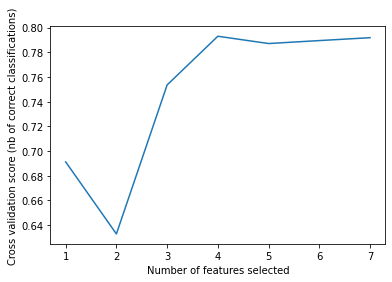

Predict:

0.8142857142857143

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       136
           1       0.77      0.68      0.72        74

    accuracy                           0.81       210
   macro avg       0.80      0.78      0.79       210
weighted avg       0.81      0.81      0.81       210



In [ ]:
# Create the RFE object and compute a cross-validated score.
#model = LogisticRegression()
#model = LinearRegression()
# model = DecisionTreeClassifier(criterion='entropy',
#                                  max_depth=20,
#                                 min_samples_split = 20, 
#                                random_state=0)
#model = KNeighborsClassifier(n_neighbors=3)
#model = GaussianNB()
#model = Perceptron()
#model = LinearSVC()
model= RandomForestClassifier(n_estimators=100)
#model = linear_model.SGDClassifier(max_iter=5, tol=None)


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=10,
              scoring='accuracy')
#print (X_train)
#print (y_train)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
#print(rfecv.support_)
i=0
for element in rfecv.support_:
  if element == True:
    print (X_train.columns[i])
  i= i+1
#print(rfecv.support_)
#print(rfecv.ranking_)


# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

X_train_rfecv = rfecv.fit_transform(X_train, y_train)
#print (X_test, X_train_rfecv.shape, X_train_rfecv)

model.fit(X_train_rfecv, y_train)

#Prueba con X_test
#X_test = ttnc_df_test.loc[:,['embarked','pclass','sex','sibsp']])
#X_test = ttnc_df_test

X_test_rfecv = rfecv.transform(X_test)
yhat = model.predict(X_test_rfecv)

#Aqui el código
#yhat1 = model.predict(ttnc_df_test.loc[:,['sex']])#Optimizado para perceptron
#yhat1 = model.predict(ttnc_df_test.loc[:,['embarked','pclass','sex','sibsp','parch']])#Optimizado para LSVC
#yhat1 = model.predict(ttnc_df_test.loc[:,['age','fare','embarked','pclass','sex','sibsp','parch']])#Optimizado para Random Forest


print("Predict:")
print()

y_true, yhat = y_test, model.predict(X_test_rfecv)
print(accuracy_score(y_test, yhat))
print()
print(classification_report(y_true, yhat))

# print(model.score(X_train_rfecv, y_train))
# acc_sgd = round(model.score(X_train_rfecv, y_train) * 100, 2)
# print(acc_sgd)

# predictions = cross_val_predict(model, X_train, y_train, cv=10)
# print(confusion_matrix(y_train, predictions))

# print("Precision:", precision_score(y_train, predictions))
# print("Recall:",recall_score(y_train, predictions))

ROC-AUC Curve y Score

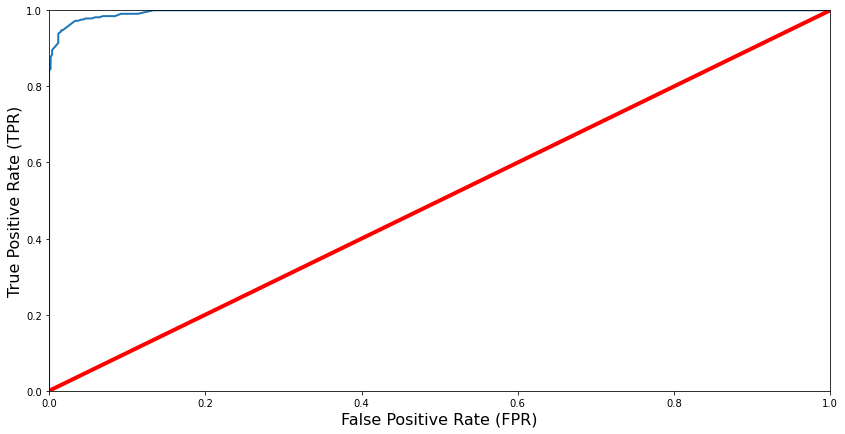

ROC-AUC-Score: 0.9963611211355708


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# getting the probabilities of our predictions
#y_scores = model.predict_proba(X_train)
y_scores = model.predict_proba(X_train_rfecv)

y_scores = y_scores[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

**Decision Tree Clasifier**

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 

# Create the RFE object and compute a cross-validated score.
#model = LogisticRegression()
#model = DecisionTreeClassifier(criterion='entropy',
#                                max_depth=20,
#                                min_samples_split = 20, 
#                                random_state=0)
from sklearn.tree import DecisionTreeClassifier


model = tree.DecisionTreeClassifier(random_state=1, max_depth=7, min_samples_split=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

#print (X_test, y_test)

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=10,
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
#print(rfecv.grid_scores_)
i=0
for element in rfecv.support_:
  if element == True:
    print (X_train.columns[i])
  i= i+1

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#  Modelo optimizado
X_train_rfecv = rfecv.fit_transform(X_train, y_train)
model.fit(X_train_rfecv, y_train)

#X_test = ttnc_df_test

X_test_rfecv = rfecv.transform(X_test)
yhat = model.predict(X_test_rfecv)
#print(accuracy_score(y_test, yhat))
#Aqui el código

# Nueva para comparar
#print(classification_report(y_test, y_hat))


print("Predict:")
print()

y_true, yhat = y_test, model.predict(X_test_rfecv)

print(accuracy_score(y_test, yhat))
print()
print(classification_report(y_true, yhat))

yhat_winer = model.predict(ttnc_df_test.loc[:,['age','fare','pclass','sex','sibsp']])



NameError: ignored

In [ ]:
# Entrena el modelo KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)


# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': np.arange(2, 10, 1), 
                     'p': [1, 2]},
                    {'n_neighbors': [2,5,10,20],
                     'algorithm': ['kd_tree'],
                     'leaf_size': [20, 30,40]}]


clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters, 
                   scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Predict:")
print()
y_true, y_hat = y_test, clf.predict(X_test)
#y_true, y_hat = y_test, clf.predict(X_test_rfecv)

print(accuracy_score(y_true, y_hat))
print()
print(classification_report(y_true, y_hat))

Best parameters set found on development set:

{'n_neighbors': 9, 'p': 1}

Grid scores on development set:

0.662 (+/-0.031) for {'n_neighbors': 2, 'p': 1}
0.654 (+/-0.034) for {'n_neighbors': 2, 'p': 2}
0.669 (+/-0.020) for {'n_neighbors': 3, 'p': 1}
0.652 (+/-0.055) for {'n_neighbors': 3, 'p': 2}
0.669 (+/-0.034) for {'n_neighbors': 4, 'p': 1}
0.660 (+/-0.023) for {'n_neighbors': 4, 'p': 2}
0.684 (+/-0.040) for {'n_neighbors': 5, 'p': 1}
0.666 (+/-0.051) for {'n_neighbors': 5, 'p': 2}
0.683 (+/-0.076) for {'n_neighbors': 6, 'p': 1}
0.663 (+/-0.079) for {'n_neighbors': 6, 'p': 2}
0.689 (+/-0.096) for {'n_neighbors': 7, 'p': 1}
0.673 (+/-0.112) for {'n_neighbors': 7, 'p': 2}
0.694 (+/-0.086) for {'n_neighbors': 8, 'p': 1}
0.670 (+/-0.085) for {'n_neighbors': 8, 'p': 2}
0.702 (+/-0.056) for {'n_neighbors': 9, 'p': 1}
0.687 (+/-0.085) for {'n_neighbors': 9, 'p': 2}
0.657 (+/-0.034) for {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 2}
0.666 (+/-0.051) for {'algorithm': 'kd_tree

Se elige como mejor Modelo DecisionTreeClasifier

Predict

0.8121019108280255

---



In [ ]:
print ("y_hat winner", yhat_winer)

y_hat winner [0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0]


A continuación se muestra la solución del titanic propuesta por:

CodingTech(2019). Predicting Titanic Survivors With Machine Learning
in https://www.youtube.com/watch?v=fS70iptz-XU

Se contempla tres clasificadores:

a) LogisticRegresion
b) Polinomial
c) Decision tree

Los mejores resultados se obtienen con Decision Tree, coincidiendo con los resultados obtenidos por nosotros. 

La solución es ligeramente mejor que la propuesta pero carece de las pruebas de precisión solicitadas


In [ ]:
import pandas as pd
from sklearn import linear_model, preprocessing

features = X.values # los datos ya están limpios y preprocesados
y= ttnc_df.iloc[1:,-1:] #Aqui esta la clave

target = y.values
#print (X, y)

# Linear regression
classifier = linear_model.LogisticRegression()

classifier_ = classifier.fit(features, target)
print ("Logistic Regresion", classifier_.score(features, target))

#Polinomial
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(poly_features, target)
print ("Polinomial classifier", classifier_.score(poly_features, target))



Logistic Regresion 0.7944550669216062
Polinomial classifier 0.7906309751434034


In [ ]:
# Prediction
import pandas as pd
import graphviz 
from sklearn import tree
from sklearn import model_selection

feature_names_ = X.columns
print (feature_names_)
features = X.values # los datos ya están limpios y preprocesados
#y= ttnc_df.iloc[1:,-1:] #Aqui esta la clave
target = y.values


#decision_tree = tree.DecisionTreeClassifier(random_state=1)
#decision_tree_ = decision_tree.fit(features, target)
#print ("Decision Tree", decision_tree_.score(features, target))

#scores = model_selection.cross_val_score(decision_tree, features, target, scoring='accuracy', cv=50 )
#print (scores)
#print (scores.mean())

decision_tree = tree.DecisionTreeClassifier(random_state=1, max_depth=7, min_samples_split=2)
decision_tree_ = decision_tree.fit(features, target)
print ("Decision Tree",decision_tree_.score(features, target))
scores = model_selection.cross_val_score(decision_tree, features, target, scoring='accuracy', cv=50 )


#print (scores)
#print (scores.mean())

#dot_data = tree.export_graphviz(decision_tree_, out_file="tree.dot")
#graph = graphviz.Source(dot_data) 
#graph.render("ccTree")


Index(['age', 'fare', 'embarked', 'pclass', 'sex', 'sibsp', 'parch'], dtype='object')
Decision Tree 0.858508604206501


X[ 0 ]  age
X[ 1 ]  fare
X[ 2 ]  embarked
X[ 3 ]  pclass
X[ 4 ]  sex
X[ 5 ]  sibsp
X[ 6 ]  parch


'ccpp_PE.pdf'

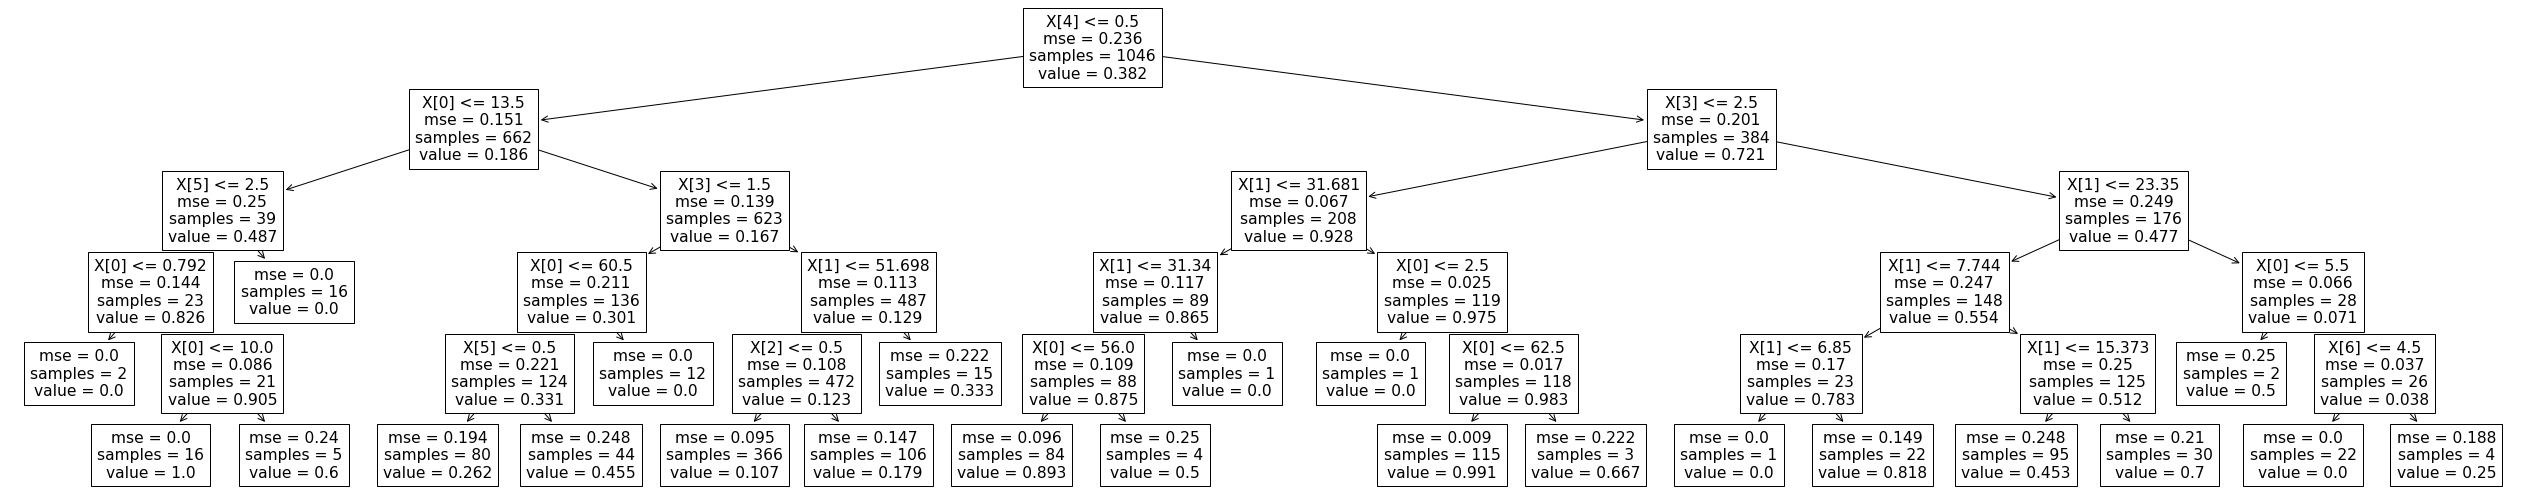

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 
#sklearn.tree.DecisionTreeRegressor

dt_m1  = tree.DecisionTreeRegressor(criterion='mse',
                              max_depth=5,
                              min_samples_split = 20, 
                              random_state=0)


dt_m1.fit(features, target);

for i in range(len(feature_names_)):
  print("X[",i,"] ",feature_names_[i])

f, ax = plt.subplots(figsize=(45, 9))
tree.plot_tree(dt_m1);

dot_data = tree.export_graphviz(dt_m1, out_file=None, 
                                feature_names = feature_names_,
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("ccpp_PE") 